In [ ]:
!pip3 install pretrainedmodels

     |████████████████████████████████| 61kB 4.0MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=e4ee9435ea7be9022bf44206f95a53207350c7b8c370e5491186c1a656996b28
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [ ]:
import pretrainedmodels
import os
from fastai import *
from fastai.vision import *

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from math import floor

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#json_file = '/content/gdrive/My Drive/Colab Notebooks/data/kaggle.json'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [ ]:
cd ICLR/

/content/gdrive/My Drive/ICLR


# Load data

In [ ]:
train_path = "train"
test_path = "test"
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)
from glob import glob
imagePatches = glob("train/*/*.*", recursive=True)
imagePatches[0:10]
path=""
from fastai.vision import *

In [ ]:
data = ImageDataBunch.from_folder('', train = 'train', test = 'test', valid_pct= 0.2 , ds_tfms = get_transforms(), size = 512,bs= 8, num_workers=0).normalize(imagenet_stats)

In [ ]:

# data = (ImageList.from_folder('data/train') #Where to find the data? -> in path and its subfolders 
#         .split_by_rand_pct()              #How to split in train/valid? -> use the folders
#         .label_from_folder()            #How to label? -> depending on the folder of the filenames
#         .transform(tfms, size=512)       #Data augmentation? -> use tfms with a size of 64
#         .add_test_folder('data/test')
#         .databunch(bs = 64)
#         )   

In [ ]:
data

ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: .;

Valid: LabelList (175 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
leaf_rust,healthy_wheat,leaf_rust,leaf_rust,leaf_rust
Path: .;

Test: LabelList (610 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: .

In [ ]:
path=""
tfms = get_transforms()

# data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=512, 
#                                      bs=16,num_workers=0,test = test_path,ds_tfms=tfms
#                                   ).normalize(imagenet_stats)
import pretrainedmodels as pm
model_name = 'se_resnext50' # 'vgg_16_2'
# pretrained = 'imagenet' if pretrained else None
_base_arch = lambda arg: pm.se_resnext50_32x4d(pretrained= 'imagenet')
learner = vision.cnn_learner(data, 
                             base_arch = _base_arch, 
                             pretrained = True, 
                             metrics = accuracy).mixup()

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth" to /root/.cache/torch/checkpoints/se_resnext50_32x4d-a260b3a4.pth


# load model

In [ ]:
data

ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: .;

Valid: LabelList (175 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
leaf_rust,stem_rust,leaf_rust,leaf_rust,leaf_rust
Path: .;

Test: LabelList (610 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: .

In [ ]:
learner.unfreeze()
learner.load('model-504')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 63),
 ('healthy_wheat', 'stem_rust', 18),
 ('healthy_wheat', 'leaf_rust', 7),
 ('stem_rust', 'leaf_rust', 7)]

In [ ]:
preds1,y1 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
learner.unfreeze()
learner.load('model-502')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
preds2,y2 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
learner.unfreeze()
learner.load('model-503')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

In [ ]:
preds3,y3 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
learner.unfreeze()
learner.load('model-504')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 63),
 ('healthy_wheat', 'stem_rust', 18),
 ('healthy_wheat', 'leaf_rust', 7),
 ('stem_rust', 'leaf_rust', 7)]

In [ ]:
preds4,y4 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
learner.unfreeze()
learner.load('model-505')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 3)]

In [ ]:
preds5,y5 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
learner.unfreeze()
learner.load('model-506')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
preds6,y6 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
learner.unfreeze()
learner.load('model-508')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
preds8,y8 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
learner.unfreeze()
learner.load('model-509')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
preds9,y9 = learner.TTA(ds_type=DatasetType.Test)

In [ ]:
preds_T = (preds1+preds2+ preds3 + preds4 + preds5 + preds6 + preds8 + preds9)/8

In [ ]:
preds_T = np.array(preds_T)

In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds_T[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()
submission.to_csv("resnet50-modelaverageall.csv", index=False)

In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds8[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()
submission.to_csv("resnet50-model508-2versioncsv", index=False)

In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds9[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()
submission.to_csv("resnet50-model509-2versioncsv", index=False)

In [ ]:
preds_T = ( preds4 + preds6 + preds7 )/3

NameError: ignored

In [ ]:
preds_T = ( preds4 + preds6 + preds8 )/3

In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds_T[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()
submission.to_csv("resnet50-modelaverage468.csv", index=False)

In [ ]:
preds_T = ( preds4 +  preds6 )/2

In [ ]:
p = (preds6 + preds_T)/2

In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = p[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()
submission.to_csv("resnet50-modelaverage46+6.csv", index=False)

In [ ]:
learner.interpret()

# load model 502 and train again by slicing te lr

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 9.12E-06


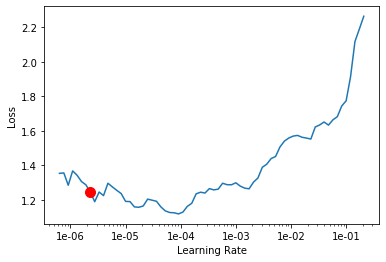

In [ ]:
learner.load('model-502')
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
learner.fit_one_cycle(6, 2.29e-06)

epoch,train_loss,valid_loss,accuracy,time
0,1.304042,0.046400,0.982857,03:18
1,1.244896,0.042296,0.982857,03:24
2,1.109544,0.081691,0.965714,03:23
3,1.107098,0.048112,0.977143,03:25
4,1.018989,0.046317,0.982857,03:23
5,1.030810,0.069922,0.965714,03:20


In [ ]:
learner.save('model-502-version2')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
#Prediction of the Test Set
preds_test, y_test = learner.get_preds(DatasetType.Test)
import os
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds_test[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.000042,0.994735,0.005223
1,GU40NL,0.000006,0.999987,0.000007
2,AD54KD,0.419802,0.562301,0.017897
3,8NRRD6,0.000002,0.999948,0.000051
4,OVOLCQ,0.001850,0.996785,0.001366


In [ ]:
submission.to_csv('submission_502_ver2.csv', index = False)

In [ ]:
learner.load('model-506')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
#Prediction of the Test Set
preds_test6, y_test6 = learner.get_preds(DatasetType.Test)

In [ ]:
learner.load('model-508')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
#Prediction of the Test Set
preds_test8, y_test8 = learner.get_preds(DatasetType.Test)

In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds_test6[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.000042,0.994735,0.005223
1,GU40NL,0.000006,0.999987,0.000007
2,AD54KD,0.419802,0.562301,0.017897
3,8NRRD6,0.000002,0.999948,0.000051
4,OVOLCQ,0.001850,0.996785,0.001366


In [ ]:
submission.to_csv('submission_506_ver2.csv', index = False)

In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds_test8[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.000042,0.994735,0.005223
1,GU40NL,0.000006,0.999987,0.000007
2,AD54KD,0.419802,0.562301,0.017897
3,8NRRD6,0.000002,0.999948,0.000051
4,OVOLCQ,0.001850,0.996785,0.001366


In [ ]:
submission.to_csv('submission_508_ver3.csv', index = False)

In [ ]:
preds_T = (preds_test + preds_test6 + preds_test8)/3


In [ ]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds_T[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.000042,0.994735,0.005223
1,GU40NL,0.000006,0.999987,0.000007
2,AD54KD,0.419802,0.562301,0.017897
3,8NRRD6,0.000002,0.999948,0.000051
4,OVOLCQ,0.001850,0.996785,0.001366


In [ ]:
submission.to_csv('submission_528.csv', index = False)

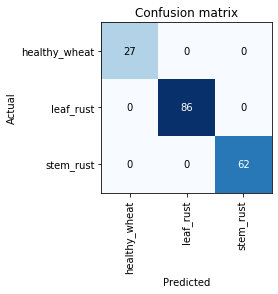

In [ ]:
interpreter.plot_confusion_matrix()

# Load mode 504 and 506 and train again

In [ ]:
learner.load('model-506')
learner.unfreeze()
learner.fit_one_cycle(5, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.179103,0.023701,0.987342,21:16
1,0.115206,0.029504,0.987342,05:32
2,0.135142,0.037538,0.987342,05:25
3,0.129298,0.028405,0.987342,05:26
4,0.104434,0.027745,0.991561,05:29


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
learner.save('model-511')
preds11,y = learner.TTA(ds_type=DatasetType.Test)

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds11[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,SS11ZQ,0.016501,0.980978,0.002521
1,GU40NL,0.000035,0.999941,0.000024
2,ROPN18,0.000006,0.999658,0.000337
3,99LHT9,0.003130,0.988395,0.008475
4,AD54KD,0.160881,0.781589,0.057529


In [ ]:
submission.to_csv("resnet50-model511.csv", index=False)

# train using resnet50

In [ ]:
learner.unfreeze()
learner.fit_one_
cycle(10, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,1.450878,0.568969,0.801688,13:14
1,1.012220,0.676842,0.789030,04:42
2,0.847287,0.440616,0.843882,04:37
3,0.610498,0.403808,0.894515,04:40
4,0.546296,0.308221,0.894515,04:39
5,0.414960,0.265189,0.890295,04:40
6,0.386397,0.223946,0.919831,04:45
7,0.341590,0.185685,0.945148,04:38
8,0.274497,0.181956,0.945148,04:37
9,0.280071,0.190195,0.940928,04:40


In [ ]:
learner.load('resnet50_stage-1')
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-2')

epoch,train_loss,valid_loss,accuracy,time
0,0.292061,0.229465,0.924051,04:43
1,0.390081,0.306800,0.915612,04:45
2,0.323234,0.247191,0.911392,04:45
3,0.297148,0.204165,0.949367,04:43
4,0.212585,0.198026,0.949367,04:43


In [ ]:
learner.load('resnet50_stage-2')
learner.unfreeze()
learner.fit_one_cycle(8, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-3')

epoch,train_loss,valid_loss,accuracy,time
0,0.193722,0.199026,0.945148,04:41
1,0.205633,0.276759,0.919831,04:42
2,0.209131,0.243463,0.924051,04:47
3,0.230395,0.209386,0.932489,04:45
4,0.230046,0.243726,0.924051,04:47
5,0.202341,0.231638,0.940928,04:45
6,0.144812,0.193467,0.953587,04:47
7,0.133441,0.203679,0.936709,04:44


In [ ]:
learner.load('resnet50_stage-3')
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-4')

epoch,train_loss,valid_loss,accuracy,time
0,0.105413,0.229278,0.928270,04:40
1,0.143122,0.252313,0.940928,04:45
2,0.190426,0.204916,0.945148,04:39
3,0.142950,0.201382,0.949367,04:41
4,0.132823,0.184883,0.953587,04:37


In [ ]:
learner.load('resnet50_stage-4')
learner.unfreeze()
learner.fit_one_cycle(8, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-5')

epoch,train_loss,valid_loss,accuracy,time
0,0.099087,0.215903,0.940928,04:39
1,0.117322,0.247782,0.949367,04:38
2,0.143615,0.288223,0.932489,04:49
3,0.163114,0.250566,0.936709,04:40
4,0.155905,0.238887,0.945148,04:40
5,0.131310,0.234172,0.945148,04:39
6,0.105284,0.216456,0.945148,04:40
7,0.087894,0.223238,0.940928,05:43


In [ ]:
learner.load('resnet50_stage-5')
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-6')

epoch,train_loss,valid_loss,accuracy,time
0,0.103639,0.255605,0.940928,05:23
1,0.111125,0.270032,0.932489,04:38
2,0.122793,0.235398,0.945148,04:38
3,0.110204,0.221021,0.945148,04:38
4,0.085906,0.195444,0.949367,04:41


In [ ]:
learner.load('resnet50_stage-6')
learner.unfreeze()
learner.fit_one_cycle(8, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-7')

epoch,train_loss,valid_loss,accuracy,time
0,0.074799,0.212421,0.936709,04:48
1,0.096134,0.267493,0.945148,04:58
2,0.096795,0.272623,0.936709,06:16
3,0.093772,0.244781,0.936709,04:41
4,0.074416,0.230746,0.932489,04:43
5,0.109861,0.201030,0.949367,04:43
6,0.060884,0.210298,0.949367,04:43
7,0.065703,0.224003,0.945148,04:47


In [ ]:
learner.load('resnet50_stage-7')
learner.unfreeze()
learner.fit_one_cycle(8, max_lr=slice(1e-5,1e-3))
learner.save('resnet50_stage-8')

epoch,train_loss,valid_loss,accuracy,time
0,0.073313,0.215567,0.949367,04:51
1,0.079922,0.248844,0.945148,04:45
2,0.074647,0.239526,0.945148,04:45
3,0.088359,0.273661,0.932489,04:47
4,0.076734,0.228980,0.940928,04:50
5,0.054576,0.229525,0.945148,04:49
6,0.051385,0.245303,0.945148,04:55
7,0.051189,0.243056,0.949367,04:51


In [ ]:
learner.load('resnet50_stage-8')
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-5,2e-5))
learner.save('resnet50_stage-9')

epoch,train_loss,valid_loss,accuracy,time
0,0.087226,0.135787,0.970464,13:51
1,0.065876,0.128894,0.962025,04:47
2,0.063925,0.110587,0.966245,04:43
3,0.075597,0.124475,0.962025,04:37
4,0.070836,0.127475,0.962025,04:36


In [ ]:
learner.load('resnet50_stage-9')
learner.unfreeze()
learner.fit_one_cycle(6, max_lr=slice(1e-5,2e-5))
learner.save('resnet50_stage-10')

epoch,train_loss,valid_loss,accuracy,time
0,0.046661,0.122090,0.962025,04:44
1,0.052335,0.158262,0.962025,04:43
2,0.065024,0.148351,0.966245,04:37
3,0.062599,0.148449,0.966245,04:39
4,0.053320,0.137432,0.966245,04:37
5,0.055377,0.155237,0.966245,04:41


In [ ]:
learner.load('resnet50_stage-10')
learner.unfreeze()
learner.fit_one_cycle(6, max_lr=slice(1e-5,2e-4))
learner.save('resnet50_stage-11')

epoch,train_loss,valid_loss,accuracy,time
0,0.043139,0.131600,0.962025,04:23
1,0.045503,0.159556,0.957806,04:29
2,0.042937,0.179373,0.966245,04:37


In [ ]:
learner.load('resnet50_stage-10')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
learner

Learner(data=ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: .;

Valid: LabelList (175 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
leaf_rust,stem_rust,leaf_rust,leaf_rust,leaf_rust
Path: .;

Test: LabelList (610 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=Tr

# Using Mixup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd ICLR/

/content/gdrive/My Drive/ICLR


In [ ]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [ ]:
!pip3 install pretrainedmodels

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pretrainedmodels
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [ ]:
#Fast AI doesn't read in .jfif by default, so we need this.
#!sudo apt install imagemagick
!cd test; mogrify -format jpg *.jfif
!cd train/healthy_wheat; mogrify -format jpg *.jfif  
!cd train/leaf_rust; mogrify -format jpg *.jfif  
!cd train/stem_rust; mogrify -format jpg *.jfif

/bin/bash: mogrify: command not found
/bin/bash: mogrify: command not found
/bin/bash: mogrify: command not found
/bin/bash: mogrify: command not found


In [ ]:
train_path = "train"
test_path = "test"
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)
from glob import glob
imagePatches = glob("train/*/*.*", recursive=True)
imagePatches[0:10]
path=""
from fastai.vision import *
tfms = get_transforms()

In [ ]:
path=""
tfms = get_transforms()

# data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=546, 
#                                      bs=16,num_workers=2,test = test_path,ds_tfms=tfms
#                                   ).normalize(imagenet_stats)
import pretrainedmodels as pm
model_name = 'se_resnext50' # 'vgg_16_2'
# pretrained = 'imagenet' if pretrained else None
model = lambda arg: pm.se_resnet50(pretrained='imagenet')


In [ ]:

data = ImageDataBunch.from_folder('', train = 'train', test = 'test', valid_pct= 0.2 , ds_tfms = get_transforms(), size = 512 , num_workers=0).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: .;

Valid: LabelList (175 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
leaf_rust,leaf_rust,healthy_wheat,healthy_wheat,leaf_rust
Path: .;

Test: LabelList (610 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: .

In [ ]:
learn_mix = vision.cnn_learner(data, 
                             base_arch = model, 
                             pretrained = True, 
                             metrics = accuracy).mixup()

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnet50-ce0d4300.pth" to /root/.cache/torch/checkpoints/se_resnet50-ce0d4300.pth


In [ ]:
learner.unfreeze()
learner.load('model-502')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'healthy_wheat', 2), ('stem_rust', 'leaf_rust', 2)]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 5.75E-07


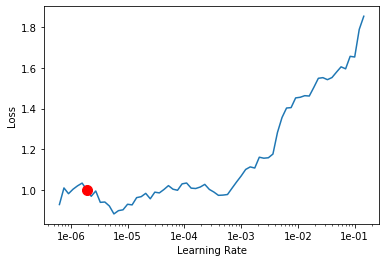

In [ ]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
lr = learner.recorder.min_grad_lr
lr

1.9054607179632473e-06

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(5,2e-5)
learner.save('resnet50_stage-2')

epoch,train_loss,valid_loss,accuracy,time
0,1.080020,0.057439,0.982857,02:53
1,0.930779,0.091777,0.971429,02:54
2,0.866237,0.089351,0.960000,02:54
3,0.877131,0.113343,0.948571,02:53
4,0.836169,0.100484,0.954286,02:52


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 4), ('stem_rust', 'healthy_wheat', 2)]

In [ ]:
preds2,y = learner.TTA(ds_type=DatasetType.Test)
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds2[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.008520,0.926685,0.064795
1,GU40NL,0.083862,0.906080,0.010057
2,AD54KD,0.735631,0.161676,0.102694
3,8NRRD6,0.045214,0.942464,0.012323
4,OVOLCQ,0.070761,0.866668,0.062571


In [ ]:
submission.to_csv("resnet50-stage2.csv", index=False)

In [ ]:
learner.unfreeze()
learner.load('resnet50_stage-2')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 2)]

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(8, 2e-5)
learner.save('resnet50_stage-3')

epoch,train_loss,valid_loss,accuracy,time
0,0.983973,0.370692,0.902857,02:56
1,1.173978,0.683311,0.782857,02:55
2,0.976973,0.971828,0.760000,02:54
3,0.892676,0.557459,0.794286,02:54
4,0.723496,0.299773,0.874286,02:56
5,0.713550,0.375889,0.880000,02:54
6,0.608317,0.325882,0.885714,02:54
7,0.652485,0.296786,0.891429,02:56


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 10),
 ('healthy_wheat', 'leaf_rust', 4),
 ('leaf_rust', 'healthy_wheat', 2),
 ('leaf_rust', 'stem_rust', 2)]

In [ ]:
learner.unfreeze()
learner.load('resnet50_stage-3')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 10),
 ('healthy_wheat', 'leaf_rust', 4),
 ('leaf_rust', 'healthy_wheat', 2),
 ('leaf_rust', 'stem_rust', 2)]

In [ ]:
learner.fit_one_cycle(5, 2e-5)
learner.save('resnet50_stage-3')

epoch,train_loss,valid_loss,accuracy,time
0,0.538589,0.301634,0.891429,02:55
1,0.561680,0.314690,0.874286,02:55
2,0.513039,0.285980,0.885714,02:54
3,0.526238,0.293164,0.891429,02:52
4,0.511583,0.304973,0.885714,02:53


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 11),
 ('healthy_wheat', 'leaf_rust', 5),
 ('leaf_rust', 'healthy_wheat', 2),
 ('leaf_rust', 'stem_rust', 2)]

In [ ]:
preds3,y = learner.TTA(ds_type=DatasetType.Test)
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

KeyboardInterrupt: ignored

In [ ]:
submission.to_csv("resnet50-stage3.csv", index=False)

# changing layers 

In [ ]:
!pip3 install pretrainedmodels
import pretrainedmodels as pm
base_arch = lambda arg: pm.se_resnext50_32x4d(pretrained='imagenet')
data = ImageDataBunch.from_folder('', train = 'train', test = 'test', valid_pct= 0.2 , ds_tfms = get_transforms(), size = 256,bs= 32, num_workers=2).normalize(imagenet_stats)
learner = vision.cnn_learner(data, 
                             base_arch = base_arch,    
                             pretrained = True, ps=0.5,
                             metrics = accuracy)

In [ ]:
learner

Learner(data=ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: .;

Valid: LabelList (175 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
stem_rust,leaf_rust,leaf_rust,stem_rust,leaf_rust
Path: .;

Test: LabelList (610 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=Tr

In [ ]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.472491,0.997683,0.760000,03:56
1,1.060565,0.738405,0.782857,02:12
2,0.788202,0.592119,0.828571,02:09


In [ ]:
learner.save('dropout_1')

In [ ]:
learner.load('dropout_1')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 15),
 ('leaf_rust', 'stem_rust', 6),
 ('healthy_wheat', 'leaf_rust', 3),
 ('healthy_wheat', 'stem_rust', 2),
 ('leaf_rust', 'healthy_wheat', 2),
 ('stem_rust', 'healthy_wheat', 2)]

In [ ]:
learner.unfreeze()
learner.load('dropout_1')
learner.fit_one_cycle(4)
learner.save('dropout_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.550502,0.851516,0.782857,02:09
1,0.527796,0.927343,0.834286,02:09
2,0.423697,0.586576,0.840000,02:12
3,0.310126,0.560832,0.851429,02:11


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 9),
 ('stem_rust', 'healthy_wheat', 5),
 ('stem_rust', 'leaf_rust', 5),
 ('healthy_wheat', 'leaf_rust', 4),
 ('leaf_rust', 'healthy_wheat', 2)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


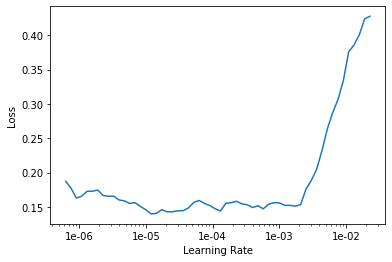

In [ ]:
learner.load('dropout_2')
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.unfreeze()
learner.load('dropout_2')
learner.fit_one_cycle(7,max_lr=slice(1e-5,1e-3))
learner.save('dropout_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.149488,0.527532,0.857143,02:11
1,0.129443,0.508658,0.868571,02:11
2,0.123505,0.506686,0.868571,02:09
3,0.121154,0.555094,0.862857,02:10
4,0.106980,0.559407,0.880000,02:10
5,0.095246,0.548877,0.874286,02:08
6,0.083121,0.542065,0.880000,02:09


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 6),
 ('stem_rust', 'leaf_rust', 6),
 ('healthy_wheat', 'leaf_rust', 4),
 ('leaf_rust', 'healthy_wheat', 3),
 ('stem_rust', 'healthy_wheat', 2)]

#using more bigger size

In [ ]:
import pretrainedmodels as pm
base_arch = lambda arg: pm.se_resnext50_32x4d(pretrained='imagenet')
data = ImageDataBunch.from_folder('', train = 'train', test = 'test', valid_pct= 0.2 , ds_tfms = get_transforms(), size = 320,bs= 16, num_workers=2).normalize(imagenet_stats)
learner = vision.cnn_learner(data, 
                             base_arch = base_arch, 
                             pretrained = True,
                             metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


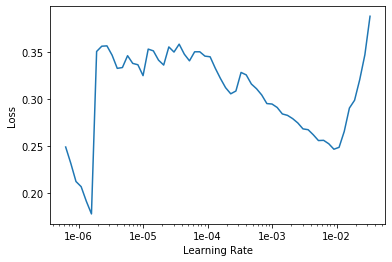

In [ ]:
learner.load('dropout_3')
learner.lr_find()
learner.recorder.plot()

In [ ]:
#learner.unfreeze()
learner.load('dropout_3')
learner.fit_one_cycle(4)
learner.save('dropout_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.308856,0.102362,0.948571,02:24
1,0.403626,0.113895,0.954286,02:21
2,0.311733,0.088510,0.965714,02:22
3,0.220906,0.081133,0.965714,02:18


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 3), ('stem_rust', 'leaf_rust', 2)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


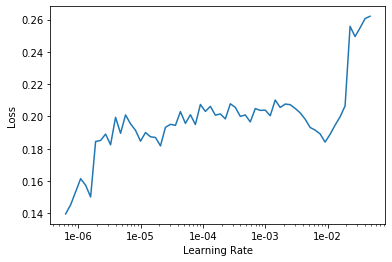

In [ ]:
learner.load('dropout_4')
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.unfreeze()
learner.load('dropout_4')
learner.fit_one_cycle(5,max_lr=slice(1e-7,1e-6))
learner.save('dropout_5')

epoch,train_loss,valid_loss,accuracy,time
0,0.177215,0.090131,0.965714,02:22
1,0.146064,0.083550,0.971429,02:21
2,0.174006,0.097133,0.954286,02:20
3,0.181067,0.085142,0.965714,02:21
4,0.167819,0.091976,0.965714,02:24


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 3), ('stem_rust', 'leaf_rust', 3)]

In [ ]:
preds,y = learner.TTA(ds_type=DatasetType.Test)
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.421414,0.572633,0.005952
1,GU40NL,0.002345,0.997023,0.000632
2,AD54KD,0.504580,0.481424,0.013996
3,8NRRD6,0.092241,0.895597,0.012161
4,OVOLCQ,0.141766,0.855617,0.002617


In [ ]:
submission.to_csv("resnet50-dropout.csv", index=False)

# more bigger size 512

In [ ]:
data = ImageDataBunch.from_folder('', train = 'train', test = 'test', valid_pct= 0.2 , ds_tfms = get_transforms(), size = 500,bs= 8, num_workers=0).normalize(imagenet_stats)
import pretrainedmodels as pm
base_arch = lambda arg: pm.se_resnext50_32x4d(pretrained='imagenet')

In [ ]:
learner = vision.cnn_learner(data, 
                             base_arch = base_arch, 
                             pretrained = True, ps=0.4,
                             metrics = accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


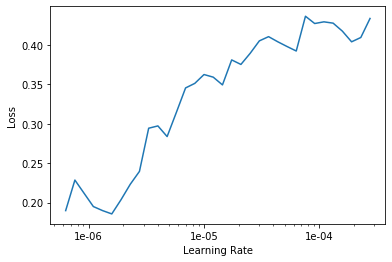

In [ ]:
learner.load('dropout_5')
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.unfreeze()
learner.load('dropout_5')
learner.fit_one_cycle(5,2e-05)
learner.save('dropout_6')

epoch,train_loss,valid_loss,accuracy,time
0,0.389206,0.082504,0.982857,02:55
1,0.421825,0.075784,0.982857,02:54
2,0.347106,0.087862,0.965714,02:54
3,0.294819,0.094539,0.960000,02:58
4,0.282235,0.089781,0.965714,02:58


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 3)]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


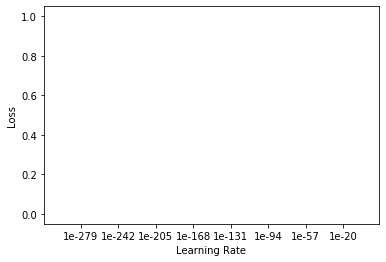

In [ ]:
learner.load('dropout_6')
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.unfreeze()
learner.load('dropout_6')
learner.fit_one_cycle(8,2e-05)
learner.save('dropout_7')

epoch,train_loss,valid_loss,accuracy,time
0,0.330376,0.094395,0.965714,02:58
1,0.255107,0.103016,0.965714,02:59
2,0.344501,0.130325,0.965714,03:01
3,0.232150,0.103635,0.954286,03:00
4,0.195196,0.099803,0.948571,03:02
5,0.195413,0.107801,0.954286,03:01
6,0.186866,0.117366,0.954286,03:00
7,0.176214,0.127019,0.948571,02:57


In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('stem_rust', 'leaf_rust', 4), ('leaf_rust', 'stem_rust', 3)]

In [ ]:
preds,y = learner.TTA(ds_type=DatasetType.Test)
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.286008,0.691012,0.022980
1,GU40NL,0.000611,0.999190,0.000199
2,AD54KD,0.668145,0.254241,0.077614
3,8NRRD6,0.092158,0.903703,0.004140
4,OVOLCQ,0.214598,0.784670,0.000732


In [ ]:
submission.to_csv("resnet50-dropout2.csv", index=False)

In [ ]:
#learner.load('dropout_6')


In [ ]:
preds,y = learner.TTA(ds_type=DatasetType.Test)
import os

submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learner.data.classes):
  submission[c] = preds[:,i]

submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,1R1HEY,0.215263,0.763283,0.021453
1,GU40NL,0.013140,0.986130,0.000730
2,AD54KD,0.791679,0.172240,0.036081
3,8NRRD6,0.007816,0.985610,0.006575
4,OVOLCQ,0.734373,0.264391,0.001236


In [ ]:
submission.to_csv("resnet50-dropout1.csv", index=False)

In [ ]:
from torchvision import models
model = models.resnext50_32x4d(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

In [ ]:
#m = nn.Sequential(*list(model.children())[:-1])
model.fc =  nn.Linear(2048, 1000)
# model.add_module('relu', torch.nn.functional.
model.dropout = nn.Dropout(0.4)
model.frelu = nn.ReLU(inplace=True)
model.out = nn.Linear(1000,3)
model.softmax = nn.Softmax(dim=1)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:

# m.fc= nn.Sequential(OrderedDict([            
#                           ('fc1', nn.Linear(2048, 256)), 
#                           ('relu', nn.ReLU()),
#                           ('bn1', nn.BatchNorm2d(256)),
#                           #('dro', nn.Dropout(0.4)),
#                           ('fc2', nn.Linear(256,3)),
#                           ('output', nn.LogSoftmax(dim=1))
#                           ]))
# learner.model=m
# m


In [ ]:
# import torch.nn as nn
# # Add on classifier
# classifier = nn.Sequential(OrderedDict([            
#                           ('fc1', nn.Linear(25088, 10000)), 
#                           ('relu', nn.ReLU()),
#                           ('fc2', nn.Linear(10000, 5000)),
#                           ('relu', nn.ReLU()),
#                           ('fc3', nn.Linear(5000, 102)),
#                           ('output', nn.LogSoftmax(dim=1))
#                           ]))

In [ ]:
# m.add_module('classifier', classifier)
#model = m

In [ ]:
#Find total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

25,031,907 total parameters.
25,031,907 training parameters.


In [ ]:
learner.model=model
learner.model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
learner.model.cuda();
# learner.summary

In [ ]:
# learner.load('dropout_4', strict=False)

In [ ]:
# learner = vision.cnn_learner(data, 
#                              base_arch = model, 
#                              pretrained = True, 
#                              metrics = accuracy).mixup()

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[]

In [ ]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.176576,0.900484,0.725714,03:27
1,1.033560,0.537255,0.817143,03:23
2,0.683782,0.446466,0.845714,03:21
3,0.605953,0.438245,0.840000,03:22
4,0.475625,0.417989,0.845714,03:23


In [ ]:
learner.save('t1')

In [ ]:
learner.fit_one_cycle(3) 

epoch,train_loss,valid_loss,accuracy,time
0,0.765022,0.462295,0.828571,03:25
1,0.693643,0.395741,0.851429,03:26
2,0.542711,0.275603,0.891429,03:26


In [ ]:
learner.fit_one_cycle(4,2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.501288,0.413773,0.828571,03:31
1,0.405546,0.382406,0.851429,03:28
2,0.352563,0.372426,0.857143,03:29
3,0.325719,0.360000,0.857143,03:26


In [ ]:
learner = vision.cnn_learner(data, 
                             base_arch = base_arch, 
                             pretrained = True, ps=0.4,
                             metrics = accuracy)
learner.model = model

In [ ]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.359666,0.495793,0.817143,03:23
1,0.708665,0.407255,0.851429,03:22
2,0.515533,0.455510,0.822857,03:24


In [ ]:
learner.save('t2')

In [ ]:
learner.fit_one_cycle(4,2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.502803,0.383264,0.840000,03:28
1,0.469477,0.412577,0.840000,03:30
2,0.504015,0.394280,0.862857,03:26
3,0.441957,0.424584,0.828571,03:26


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.51E-06


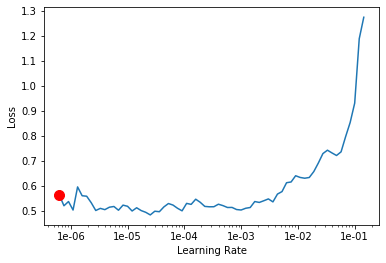

In [ ]:
# learner.save('t3')
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
learner.fit_one_cycle(10,2e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.448801,0.372300,0.834286,03:30
1,0.489583,0.415657,0.834286,03:24
2,0.450270,0.405714,0.834286,03:28
3,0.464954,0.404301,0.851429,03:25


In [ ]:
learner.load('t3')

Learner(data=ImageDataBunch;

Train: LabelList (701 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: .;

Valid: LabelList (175 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
healthy_wheat,stem_rust,leaf_rust,leaf_rust,stem_rust
Path: .;

Test: LabelList (610 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mod

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('leaf_rust', 'stem_rust', 5),
 ('stem_rust', 'leaf_rust', 5),
 ('healthy_wheat', 'leaf_rust', 4),
 ('leaf_rust', 'healthy_wheat', 4),
 ('stem_rust', 'healthy_wheat', 3)]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-07


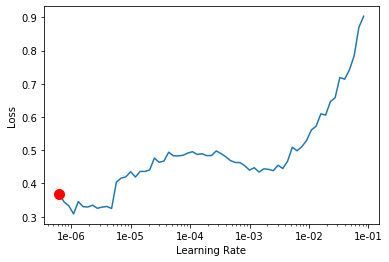

In [ ]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
learner.fit_one_cycle(10, 1.10e-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.509905,0.307798,0.862857,06:47
1,0.502794,0.295387,0.885714,05:45
2,0.495503,0.276770,0.902857,05:59
3,0.494973,0.299699,0.880000,06:05
4,0.521351,0.265338,0.897143,05:46
5,0.484830,0.287015,0.902857,06:07
6,0.509194,0.270226,0.908571,06:11
7,0.504100,0.279904,0.902857,05:56
8,0.454137,0.322773,0.880000,05:55
9,0.471708,0.304311,0.880000,05:56


In [ ]:
learner.save('t4')
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=3)

[('healthy_wheat', 'leaf_rust', 5),
 ('stem_rust', 'leaf_rust', 5),
 ('leaf_rust', 'healthy_wheat', 4),
 ('leaf_rust', 'stem_rust', 4),
 ('stem_rust', 'healthy_wheat', 3)]

# adding generalaize mean pooling

In [ ]:
from torch.nn.parameter import Parameter
def gem(x, p=3, eps=1e-6):
    return F.avg_pool2d(x.clamp(min=eps).pow(p), (x.size(-2), x.size(-1))).pow(1./p)
class GeM(nn.Module):
    def __init__(self, p=3, eps=1e-6):
        super(GeM,self).__init__()
        self.p = Parameter(torch.ones(1)*p)
        self.eps = eps
    def forward(self, x):
        return gem(x, p=self.p, eps=self.eps)       
    def __repr__(self):
        return self.__class__.__name__ + '(' + 'p=' + '{:.4f}'.format(self.p.data.tolist()[0]) + ', ' + 'eps=' + str(self.eps) + ')'
#model = se_resnet50(num_classes=1000, pretrained='imagenet')
model = base_arch


In [ ]:
model.avgpool = GeM()
learner.model = model

<function __main__.<lambda>>

In [ ]:
#learner.load('t4')
#learner.unfreeze()
# learner.model.cuda();


In [ ]:
learner.fit_one_cycle(10, 2e-5)

AttributeError: ignored

In [ ]:
arch

<function __main__.<lambda>>

In [ ]:
learner.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (1): Sequential(
      (0): SEResNeXtBottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inpl